In [1]:
#| include: false
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.core.tools.numeric import to_numeric
import geopandas as gpd

import plotly as px
import plotly.express as px # for interactive plots
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

import os
import warnings
warnings.filterwarnings("ignore")


In [2]:
data = pd.read_csv("C:/Users/Nastaran/Desktop/UniversityConstructor/semester3/Vitualization/FinalProject/DataStory_UniversityRanking/data/WDI2023_Data.csv")


In [3]:
data.head(10)

,Country Name,Country Code,Series Name,Series Code,2023 [YR2023]
0,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,22977677861
1,Albania,ALB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.439149499
2,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,8367.775731
3,Albania,ALB,Research and development expenditure (% of GDP),GB.XPD.RSDV.GD.ZS,..
4,Albania,ALB,"Population, total",SP.POP.TOTL,2745972
5,Albania,ALB,Urban population (% of total population),SP.URB.TOTL.IN.ZS,64.603
6,Albania,ALB,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,..
7,Albania,ALB,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,..
8,Albania,ALB,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,..
9,Algeria,DZA,GDP (current US$),NY.GDP.MKTP.CD,2.39899E+11


In [4]:



data_2023 = data[data['Series Name'].notnull() & data['Country Name'].notnull()]


data_2023 = data_2023[['Country Name', 'Series Name', '2023 [YR2023]']]


data_pivoted = data_2023.pivot(index='Country Name', columns='Series Name', values='2023 [YR2023]')


df_economics = data_pivoted.reset_index()


print(df_economics.head())
print(df_economics.info())


Series Name                 Country Name GDP (current US$)  \
0            Africa Eastern and Southern       1.23616E+12   
1             Africa Western and Central       7.96586E+11   
2                                Albania       22977677861   
3                                Algeria       2.39899E+11   
4                         American Samoa                ..   

Series Name GDP growth (annual %) GDP per capita (current US$)  \
0                     2.622310407                  1672.505957   
1                     3.342775594                  1584.333285   
2                     3.439149499                  8367.775731   
3                             4.1                   5260.20625   
4                              ..                           ..   

Series Name Government expenditure on education, total (% of GDP)  \
0                                                           ..      
1                                                           ..      
2                      

In [5]:
df_economics.isnull()

Series Name,Country Name,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),"Government expenditure on education, total (% of GDP)","Inflation, consumer prices (annual %)","Population, total",Research and development expenditure (% of GDP),"Unemployment, total (% of total labor force) (national estimate)",Urban population (% of total population)
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
137,False,False,False,False,False,False,False,False,False,False
138,False,False,False,False,False,False,False,False,False,False
139,False,False,False,False,False,False,False,False,False,False
140,False,False,False,False,False,False,False,False,False,False


In [6]:
df_economics.columns

Index(['Country Name', 'GDP (current US$)', 'GDP growth (annual %)',
       'GDP per capita (current US$)',
       'Government expenditure on education, total (% of GDP)',
       'Inflation, consumer prices (annual %)', 'Population, total',
       'Research and development expenditure (% of GDP)',
       'Unemployment, total (% of total labor force) (national estimate)',
       'Urban population (% of total population)'],
      dtype='object', name='Series Name')

In [7]:
# check Null values in each column in the dataset

def check_NullValues():
    out=df_economics.isnull().sum()
    found=0
    for counter in out.index:
        if out[counter]>0:
            found=found+1
            print( "column", counter , " is having ",out[counter] , "Null values")


    if(found==0):
        print("No Null values found in dataframe")

In [8]:
#Show Null value columns alongwith quantity of Null values 
check_NullValues()

No Null values found in dataframe


In [9]:
df_economics.to_csv("Alleconomics.csv", index=False)

In [10]:
data_economics_clean = pd.read_csv("C:/Users/Nastaran/Desktop/UniversityConstructor/semester3/Vitualization/FinalProject/DataStory_UniversityRanking/economics.csv")


In [11]:
data_economics_clean.shape

(24, 8)

In [12]:
#Loading the dataset
df_universities = pd.read_csv('top_150_unis.csv')

In [13]:
df_universities.shape

(200, 29)

In [14]:
df_universities.columns

Index(['rank_order', 'rank', 'name', 'scores_overall', 'scores_overall_rank',
       'scores_teaching', 'scores_teaching_rank', 'scores_research',
       'scores_research_rank', 'scores_citations', 'scores_citations_rank',
       'scores_industry_income', 'scores_industry_income_rank',
       'scores_international_outlook', 'scores_international_outlook_rank',
       'record_type', 'member_level', 'url', 'nid', 'location',
       'stats_number_students', 'stats_student_staff_ratio',
       'stats_pc_intl_students', 'stats_female_male_ratio', 'aliases',
       'subjects_offered', 'closed', 'unaccredited', 'disabled'],
      dtype='object')

In [15]:
import pandas as pd


merged_data = pd.merge(df_universities, data_economics_clean, how='left', left_on='name', right_on='Country Name')


merged_data['Country Name'] = merged_data['Country Name'].fillna(merged_data['location'])


merged_data['location'] = merged_data.apply(
    lambda x: x['Country Name'] if pd.isna(x['location']) else x['location'], axis=1
)


merged_data.to_csv("merged_data.csv", index=False)


print(merged_data.head())


   rank_order  rank                                   name  scores_overall  \
0          10     1                   University of Oxford            96.4   
1          20     2                     Harvard University            95.2   
2          30     3                University of Cambridge            94.8   
3          40     3                    Stanford University            94.8   
4          50     5  Massachusetts Institute of Technology            94.2   

   scores_overall_rank  scores_teaching  scores_teaching_rank  \
0                   10             92.3                     5   
1                   20             94.8                     1   
2                   30             90.9                     7   
3                   40             94.2                     2   
4                   50             90.7                     8   

   scores_research  scores_research_rank  scores_citations  ...  unaccredited  \
0             99.7                     1              99.0 

In [16]:


merged_data = pd.merge(df_universities, data_economics_clean, how='left', left_on='location', right_on='Country Name')


In [17]:
merged_data.columns

Index(['rank_order', 'rank', 'name', 'scores_overall', 'scores_overall_rank',
       'scores_teaching', 'scores_teaching_rank', 'scores_research',
       'scores_research_rank', 'scores_citations', 'scores_citations_rank',
       'scores_industry_income', 'scores_industry_income_rank',
       'scores_international_outlook', 'scores_international_outlook_rank',
       'record_type', 'member_level', 'url', 'nid', 'location',
       'stats_number_students', 'stats_student_staff_ratio',
       'stats_pc_intl_students', 'stats_female_male_ratio', 'aliases',
       'subjects_offered', 'closed', 'unaccredited', 'disabled',
       'Country Name', 'GDP (current US$)', 'GDP growth (annual %)',
       'GDP per capita (current US$)', 'Inflation, consumer prices (annual %)',
       'Population, total',
       'Unemployment, total (% of total labor force) (national estimate)',
       'Urban population (% of total population)'],
      dtype='object')

In [18]:
merged_data.shape

(200, 37)

In [19]:

print(merged_data.head())


   rank_order  rank                                   name  scores_overall  \
0          10     1                   University of Oxford            96.4   
1          20     2                     Harvard University            95.2   
2          30     3                University of Cambridge            94.8   
3          40     3                    Stanford University            94.8   
4          50     5  Massachusetts Institute of Technology            94.2   

   scores_overall_rank  scores_teaching  scores_teaching_rank  \
0                   10             92.3                     5   
1                   20             94.8                     1   
2                   30             90.9                     7   
3                   40             94.2                     2   
4                   50             90.7                     8   

   scores_research  scores_research_rank  scores_citations  ...  unaccredited  \
0             99.7                     1              99.0 

In [20]:
merged_data.shape

(200, 37)

In [21]:

merged_data.to_csv("WDIUNI.csv", index=False)


In [22]:
merged_data.columns

Index(['rank_order', 'rank', 'name', 'scores_overall', 'scores_overall_rank',
       'scores_teaching', 'scores_teaching_rank', 'scores_research',
       'scores_research_rank', 'scores_citations', 'scores_citations_rank',
       'scores_industry_income', 'scores_industry_income_rank',
       'scores_international_outlook', 'scores_international_outlook_rank',
       'record_type', 'member_level', 'url', 'nid', 'location',
       'stats_number_students', 'stats_student_staff_ratio',
       'stats_pc_intl_students', 'stats_female_male_ratio', 'aliases',
       'subjects_offered', 'closed', 'unaccredited', 'disabled',
       'Country Name', 'GDP (current US$)', 'GDP growth (annual %)',
       'GDP per capita (current US$)', 'Inflation, consumer prices (annual %)',
       'Population, total',
       'Unemployment, total (% of total labor force) (national estimate)',
       'Urban population (% of total population)'],
      dtype='object')

In [23]:
merged_data

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,...,unaccredited,disabled,Country Name,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),"Inflation, consumer prices (annual %)","Population, total","Unemployment, total (% of total labor force) (national estimate)",Urban population (% of total population)
0,10,1,University of Oxford,96.4,10,92.3,5,99.7,1,99.0,...,False,False,United Kingdom,3.340000e+12,0.104018,48866.60396,6.793967068,6.835000e+07,4.025,84.642
1,20,2,Harvard University,95.2,20,94.8,1,99.0,3,99.3,...,False,False,United States,2.740000e+13,2.542700,81695.18707,4.116338384,3.349149e+08,3.638,83.298
2,30,3,University of Cambridge,94.8,30,90.9,7,99.5,2,97.0,...,False,False,United Kingdom,3.340000e+12,0.104018,48866.60396,6.793967068,6.835000e+07,4.025,84.642
3,40,3,Stanford University,94.8,40,94.2,2,96.7,7,99.8,...,False,False,United States,2.740000e+13,2.542700,81695.18707,4.116338384,3.349149e+08,3.638,83.298
4,50,5,Massachusetts Institute of Technology,94.2,50,90.7,8,93.6,11,99.8,...,False,False,United States,2.740000e+13,2.542700,81695.18707,4.116338384,3.349149e+08,3.638,83.298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1960,196,University of Erlangen-Nuremberg,54.5,1960,44.6,165,47.5,151,68.8,...,False,False,Germany,4.460000e+12,-0.304935,52745.75571,5.946436677,8.448227e+07,3.068,77.765
196,1970,196,Sichuan University,54.5,1970,57.1,71,58.6,87,48.6,...,False,False,China,1.780000e+13,5.200000,12614.06099,0.234836829,1.410710e+09,..,64.570
197,1980,198,Durham University,54.4,1980,40.0,234,44.6,180,70.0,...,False,False,United Kingdom,3.340000e+12,0.104018,48866.60396,6.793967068,6.835000e+07,4.025,84.642
198,1990,198,Queen’s University Belfast,54.4,1990,31.1,483,37.9,264,84.4,...,False,False,United Kingdom,3.340000e+12,0.104018,48866.60396,6.793967068,6.835000e+07,4.025,84.642


**Which universities excel in teaching, research, and international outlook on a global scale?** Importance of the Current Question
Understanding Strengths: Identifying universities excelling in teaching, research, and international outlook helps stakeholders understand where the best educational practices and innovations are occurring.

Student Decision-Making: Prospective students can better align their educational choices with their career goals by knowing which universities excel in teaching quality and research opportunities.

Institutional Improvement: Universities can benchmark themselves against top performers in specific areas, guiding strategic planning and resource allocation to improve teaching and research capabilities.

Funding and Partnerships: Organizations and governments can use this information to target funding, support, and partnerships toward institutions demonstrating excellence in teaching and research.

Global Competitiveness: By understanding which universities excel in these areas, countries can evaluate their educational systems and competitiveness on a global scale.

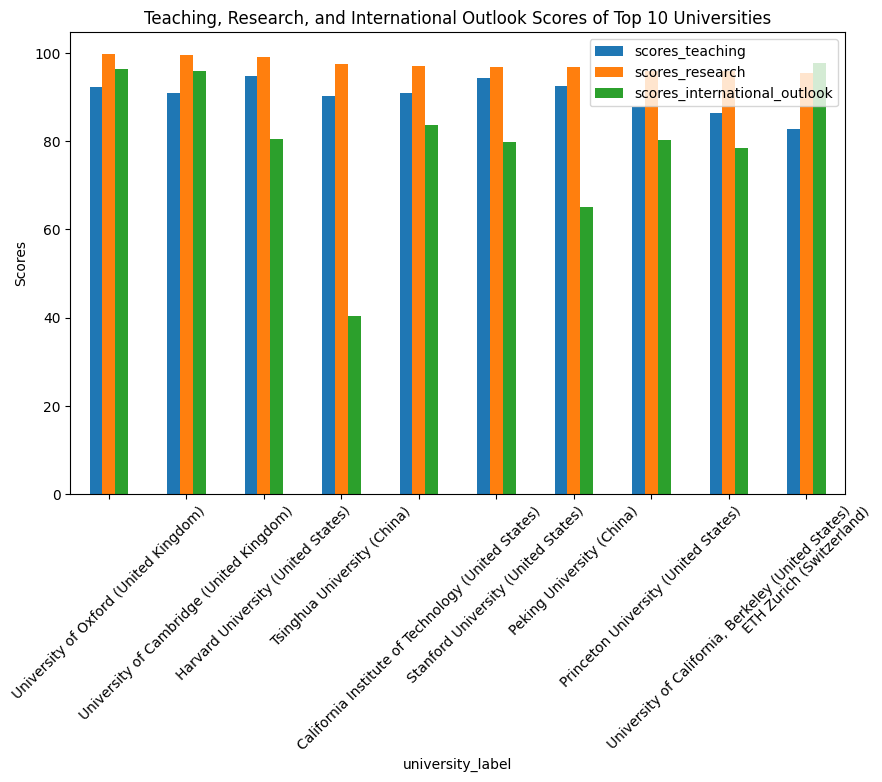

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort universities by overall research scores and select top 10
# Combine university names with their locations
merged_data['university_label'] = merged_data['name'] + ' (' + merged_data['location'] + ')'
merged_data_1 = merged_data[['university_label', 'scores_teaching', 'scores_research', 'scores_international_outlook']].sort_values(by='scores_research', ascending=False).head(10)

# Create a bar chart for top 10 universities
merged_data_1.set_index('university_label').plot(kind='bar', figsize=(10, 6))
plt.title('Teaching, Research, and International Outlook Scores of Top 10 Universities')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.show()


In [25]:
merged_data.columns

Index(['rank_order', 'rank', 'name', 'scores_overall', 'scores_overall_rank',
       'scores_teaching', 'scores_teaching_rank', 'scores_research',
       'scores_research_rank', 'scores_citations', 'scores_citations_rank',
       'scores_industry_income', 'scores_industry_income_rank',
       'scores_international_outlook', 'scores_international_outlook_rank',
       'record_type', 'member_level', 'url', 'nid', 'location',
       'stats_number_students', 'stats_student_staff_ratio',
       'stats_pc_intl_students', 'stats_female_male_ratio', 'aliases',
       'subjects_offered', 'closed', 'unaccredited', 'disabled',
       'Country Name', 'GDP (current US$)', 'GDP growth (annual %)',
       'GDP per capita (current US$)', 'Inflation, consumer prices (annual %)',
       'Population, total',
       'Unemployment, total (% of total labor force) (national estimate)',
       'Urban population (% of total population)', 'university_label'],
      dtype='object')

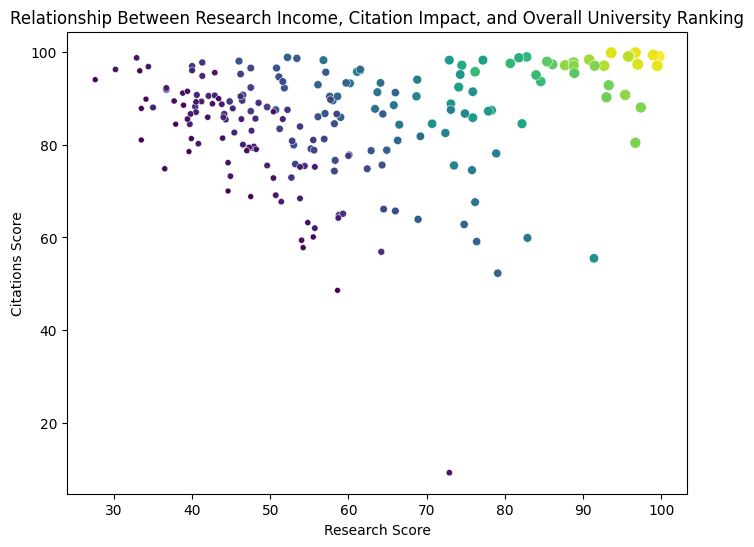

In [26]:
import seaborn as sns

# Create a scatter plot to show the relationship between research, citations, and overall ranking
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged_data, x='scores_research', y='scores_citations', size='scores_overall', hue='scores_overall', palette='viridis', legend=False)
plt.title('Relationship Between Research Income, Citation Impact, and Overall University Ranking')
plt.xlabel('Research Score')
plt.ylabel('Citations Score')
plt.show()


In [27]:
import plotly.graph_objects as go


selected_universities = merged_data[merged_data['rank'] <= 10]

fig_radar = go.Figure()

for _, row in selected_universities.iterrows():
    
    university_label = f"{row['name']} (Rank: {row['rank']})"
    
    
    fig_radar.add_trace(go.Scatterpolar(
        r=[
            row['scores_teaching'],
            row['scores_research'],
            row['scores_international_outlook'],
            row['scores_teaching']  
        ],
        theta=['Teaching', 'Research', 'International Outlook', 'Teaching'],
        fill='toself',
        name=university_label  
    ))

fig_radar.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 100])
    ),
    title='Comparison of Top Universities in Teaching, Research, and International Outlook'
)

fig_radar.show()


In [28]:
# Sort universities by industry income
df_sorted = merged_data[['name', 'scores_industry_income']].sort_values(by='scores_industry_income', ascending=False)

# Display the top universities
df_sorted.head(20)

,name,scores_industry_income
32,LMU Munich,100.0
15,Tsinghua University,100.0
58,Wageningen University & Research,100.0
91,Korea Advanced Institute of Science and Techno...,100.0
51,Shanghai Jiao Tong University,100.0
66,Zhejiang University,100.0
29,Technical University of Munich,100.0
24,Duke University,99.6
41,KU Leuven,99.2
100,University of Basel,99.2


In [29]:



top_universities = merged_data.loc[merged_data.groupby('Country Name')['scores_overall_rank'].idxmin()]


result = top_universities[['Country Name', 'name', 'scores_overall_rank']]


result = result.sort_values(by='scores_overall_rank')


print(result)


           Country Name                                               name  \
0        United Kingdom                               University of Oxford   
1         United States                                 Harvard University   
11          Switzerland                                         ETH Zurich   
15                China                                Tsinghua University   
17               Canada                              University of Toronto   
18            Singapore                   National University of Singapore   
29              Germany                     Technical University of Munich   
33            Australia                            University of Melbourne   
38                Japan                            The University of Tokyo   
41              Belgium                                          KU Leuven   
46               France  Paris Sciences et Lettres – PSL Research Unive...   
48               Sweden                               Karolinska

**Which countries have the highest-ranked universities globally, showcasing the top institution from each nation?"** is important for several reasons:

Quality of Education: High-ranked universities often indicate high-quality education, research, and academic resources. This information can help students and researchers choose the best options for their studies or academic collaborations.

Attracting International Students: Countries with prestigious universities tend to be more attractive to international students. This can contribute to the economic and cultural growth of those countries.

Global Competitiveness: Comparing universities helps countries understand where they need to improve and how they can perform better in the global arena. This information can aid policymakers in implementing more effective educational policies.

Research and Innovation Development: Top universities are often leaders in research and innovation. This information can assist industries and governments in identifying strengths and collaboration opportunities in research.

Social and Economic Impact: Universities, as educational and research institutions, have a significant impact on the society and economy of countries. Identifying top universities can enhance understanding of their contributions to social and economic development.

Choosing Educational Paths: For students and parents, knowing the best universities can aid in decision-making regarding educational and career paths.

In [30]:

import plotly.express as px
import plotly.io as pio
from plotly.offline import init_notebook_mode, iplot

# انتخاب دانشگاه‌های با رنک پایین‌تر یا برابر با 45
best_universities = merged_data.loc[merged_data['rank'] <= 50]

# مرتب‌سازی بر اساس نمرات
best_universities_sorted = best_universities.sort_values(by='scores_overall', ascending=False)

# ساخت نمودار بار با استفاده از نمرات
fig = px.bar(
    best_universities_sorted,
    x='Country Name', 
    y='scores_overall',  # تغییر به نمرات کلی
    color='scores_overall',  # رنگ بر اساس نمرات
    title='Top-Ranked Universities by Country',
    labels={'Country Name': 'Country Name', 'scores_overall': 'Overall Scores'},
    text='name'  
)

# نمایش نمودار
init_notebook_mode(connected=True)
iplot(fig)



**Why is it important to identify which universities are the highest-ranked globally, representing the top institution in each country?**

Global Education Landscape: Understanding the distribution of top-ranked universities helps to illuminate the global education landscape. It provides insights into which countries are excelling in higher education and research.

Educational Opportunities: Prospective students can make informed decisions about where to pursue their education based on university rankings, considering factors like academic reputation, research output, and international collaborations.

Policy and Investment Decisions: Governments and educational institutions can use this information to develop policies aimed at improving higher education. Identifying successful models can guide investment decisions and initiatives to bolster educational quality.

Cultural Exchange and Collaboration: Recognizing top institutions can encourage international partnerships and cultural exchanges, fostering a more interconnected global academic community.

Employment and Economic Impact: Universities are critical in shaping the workforce. Countries with highly-ranked universities often have a competitive advantage in attracting businesses and talent, which can contribute to economic growth.

In [31]:
import pandas as pd
import plotly.express as px

# Assuming 'merged_data' contains your data with 'Country Name', 'rank', and 'name' columns
# Filter to get the highest-ranked university for each country
highest_ranked_universities = merged_data.loc[merged_data.groupby('Country Name')['rank'].idxmin()]

# Create a map visualization
fig = px.choropleth(
    highest_ranked_universities,
    locations='Country Name',
    locationmode='country names',
    color='rank',
    hover_name='name',  # Show university name on hover
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Highest-Ranked Universities by Country',
    labels={'rank': 'University Rank'},
)

# Show the figure
#fig.show()
init_notebook_mode(connected=True)
iplot(fig)


In [32]:
# Define GDP per capita categories
merged_data['GDP per Capita Category'] = pd.cut(
    merged_data['GDP per capita (current US$)'],
    bins=[0, 1000, 5000, 10000, 20000, 50000, float('inf')],
    labels=['Low', 'Lower-Middle', 'Upper-Middle', 'High', 'Very High', 'Ultra High']
)

fig = px.box(
    merged_data,
    x='GDP per Capita Category',
    y='scores_overall_rank',
    title='University Rank Distribution by GDP Per Capita Category',
    labels={'GDP per Capita Category': 'GDP Per Capita Category', 'scores_overall_rank': 'University Rank'}
)

#fig.show()
init_notebook_mode(connected=True)
iplot(fig)

a heatmap to show the correlation between different economic factors (GDP, GDP growth, etc.) and university rankings.
Interpretation: This can help identify which economic factors have the strongest relationships with university rankings. For instance, a strong positive correlation between GDP and university rankings could suggest that economic strength contributes to better education systems.

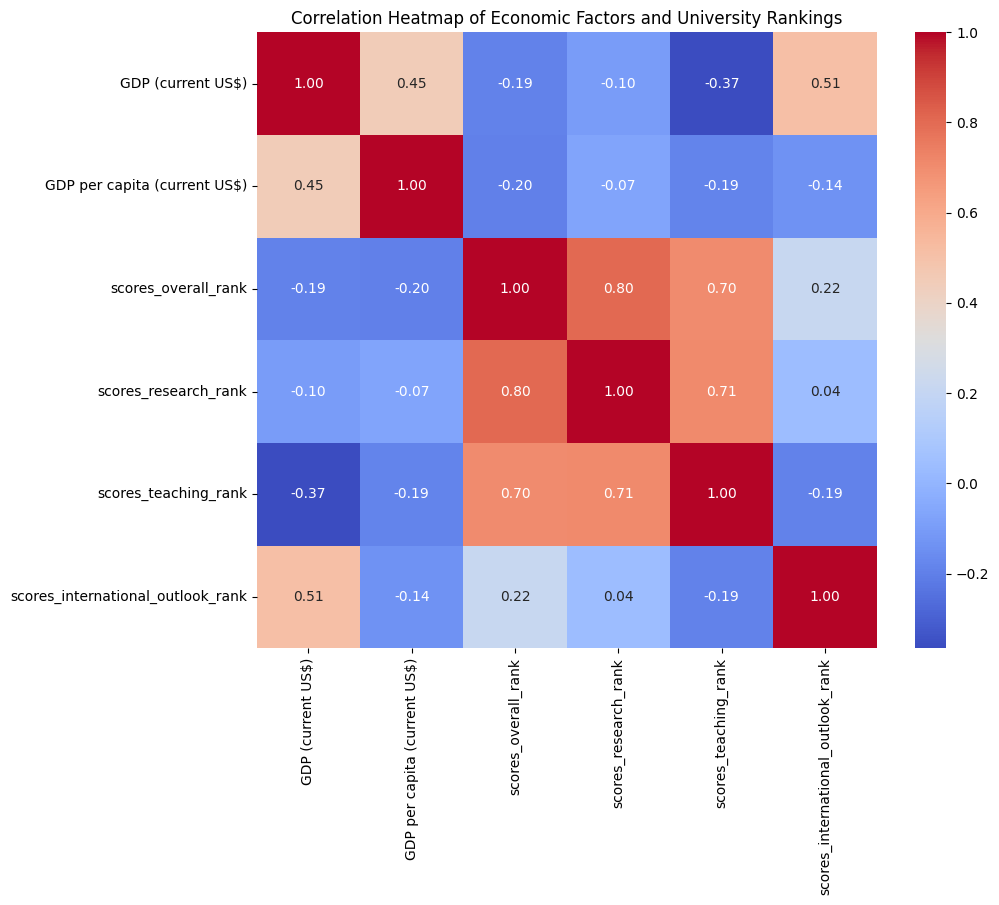

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = merged_data[['GDP (current US$)', 'GDP per capita (current US$)', 'scores_overall_rank', 'scores_research_rank', 'scores_teaching_rank', 'scores_international_outlook_rank']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Economic Factors and University Rankings')
plt.show()


Economic Factors Influence Rankings: Higher GDP and GDP per capita are often correlated with better university rankings, suggesting that wealthier nations invest more in education.
Outliers and Exceptions: It’s important to identify countries that may have high-ranking universities despite lower GDPs, which may indicate other factors at play, such as government investment in education or historical legacies.
Regional Trends: These visualizations may help identify geographic trends in education quality related to economic performance.

**Main Story**,The Interplay Between Economic Performance and Higher Education Quality"

This narrative explores how economic indicators such as GDP, GDP growth, and population demographics correlate with the rankings and performance of universities across different countries. By analyzing these relationships, we can gain insights into how nations invest in education and the resulting impact on their higher education systems.

What is the relationship between GDP and university rankings?

Visualization: Scatter Plot
Description: Plot GDP (current US$) against overall university rank.
Insights: Investigate whether higher GDP correlates with higher-ranked universities.

## 2. Key Insight on Economy (Rising Insight)

In [34]:
fig = px.scatter(
    merged_data,
    x='GDP (current US$)',
    y='scores_overall_rank',
    color='Country Name',
    title='GDP vs. Overall University Rank',
    labels={'GDP (current US$)': 'GDP (Current US$)', 'scores_overall_rank': 'University Rank'},
    hover_name='Country Name',
    log_x=True,
    log_y=True
)
#fig.show()
init_notebook_mode(connected=True)
iplot(fig)


How do teaching and research scores vary by country?

Visualization: Box Plot
Description: Show the distribution of teaching and research scores across different countries.
Insights: Identify which countries excel in teaching vs. research.

In [35]:
fig = px.box(
    merged_data,
    x='Country Name',
    y='scores_teaching',
    title='Distribution of Teaching Scores by Country',
    labels={'Country Name': 'Country', 'scores_teaching': 'Teaching Scores'},
    color='Country Name'
)
#fig.show()
init_notebook_mode(connected=True)
iplot(fig)

Which countries have the best international outlook in their universities?

Visualization: Bar Chart
Description: Rank countries by their average scores in international outlook.
Insights: Highlight global educational hubs that attract international students and faculty.

In [36]:
avg_international_outlook = merged_data.groupby('Country Name')['scores_international_outlook'].mean().reset_index()

fig = px.bar(
    avg_international_outlook,
    x='Country Name',
    y='scores_international_outlook',
    title='Average International Outlook Scores by Country',
    labels={'Country Name': 'Country', 'scores_international_outlook': 'Average International Outlook Score'}
)
#fig.show()
init_notebook_mode(connected=True)
iplot(fig)

How do university rankings differ between countries with different GDP growth rates?

Visualization: Violin Plot
Description: Show the distribution of university ranks across different GDP growth categories.
Insights: Assess how economic growth impacts educational quality and university performance.

In [37]:
merged_data['GDP Growth Category'] = pd.cut(
    merged_data['GDP growth (annual %)'],
    bins=[-float('inf'), 0, 2, 5, 10, float('inf')],
    labels=['Negative Growth', 'Low Growth', 'Moderate Growth', 'High Growth', 'Very High Growth']
)

fig = px.violin(
    merged_data,
    x='GDP Growth Category',
    y='scores_overall_rank',
    title='University Rankings by GDP Growth Rate',
    labels={'GDP Growth Category': 'GDP Growth Rate Category', 'scores_overall_rank': 'University Rank'}
)
#fig.show()
init_notebook_mode(connected=True)
iplot(fig)


What is the impact of student-to-staff ratios on university rankings?

Visualization: Scatter Plot
Description: Plot student-to-staff ratios against overall university ranks.
Insights: Investigate whether better staff-to-student ratios lead to higher academic performance.

In [38]:
fig = px.scatter(
    merged_data,
    x='stats_student_staff_ratio',
    y='scores_overall_rank',
    color='Country Name',
    title='Student-Staff Ratio vs. University Rank',
    labels={'stats_student_staff_ratio': 'Student-Staff Ratio', 'scores_overall_rank': 'University Rank'}
)
#fig.show()
init_notebook_mode(connected=True)
iplot(fig)

How does the urban population correlate with university performance?

Visualization: Heatmap
Description: Display the correlation between urban population percentage and university scores.
Insights: Explore whether urban areas, which might have better resources, lead to better-performing universities.

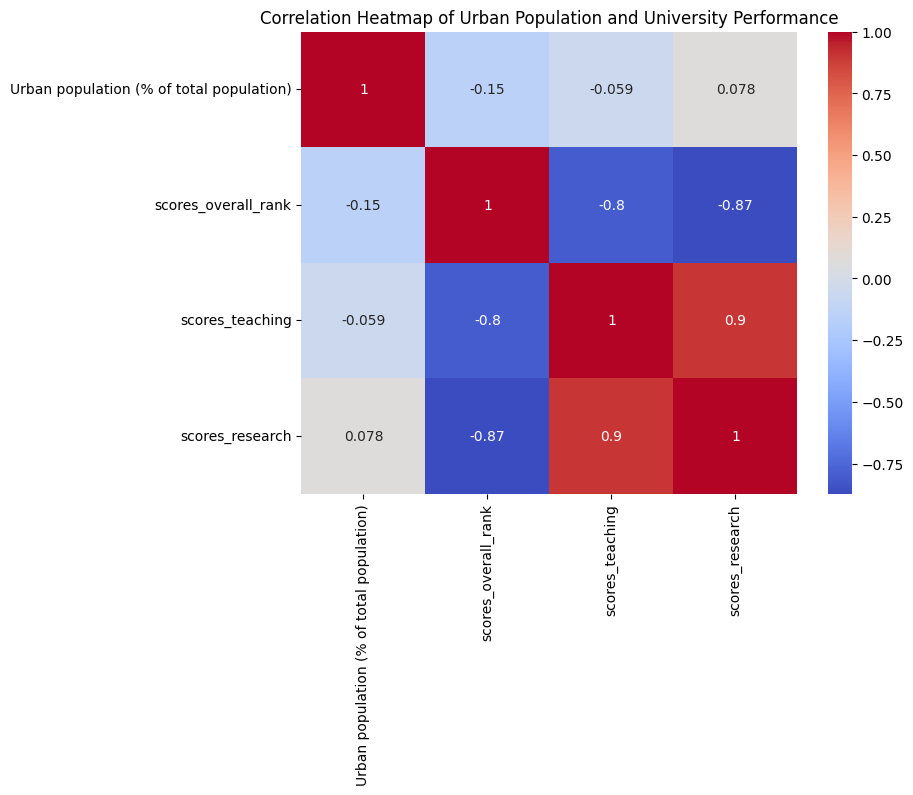

In [39]:
correlation_matrix = merged_data[['Urban population (% of total population)', 'scores_overall_rank', 'scores_teaching', 'scores_research']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Urban Population and University Performance')
plt.show()


How do gender ratios in student populations affect university rankings?

Visualization: Bar Chart
Description: Compare average university ranks based on female-to-male ratios.
Insights: Investigate gender diversity in education and its potential impact on university performance.

In [40]:
fig = px.bar(
    merged_data,
    x='stats_female_male_ratio',
    y='scores_overall_rank',
    title='University Rank by Female-to-Male Ratio',
    labels={'stats_female_male_ratio': 'Female-to-Male Ratio', 'scores_overall_rank': 'University Rank'}
)
#fig.show()
init_notebook_mode(connected=True)
iplot(fig)

# Telling Story
## 1. Initial Context (Setting)/hook
The Times Higher Education World University Rankings are the only global performance tables that judge research-intensive universities across all their core missions: teaching, research, knowledge transfer and international outlook. We use 13 carefully calibrated performance indicators to provide the most comprehensive and balanced comparisons, trusted by students, academics, university leaders, industry and governments.

**The performance indicators are grouped into five areas: Teaching (the learning environment); Research (volume, income and reputation); Citations (research influence); International outlook (staff, students and research); and Industry income (knowledge transfer).**

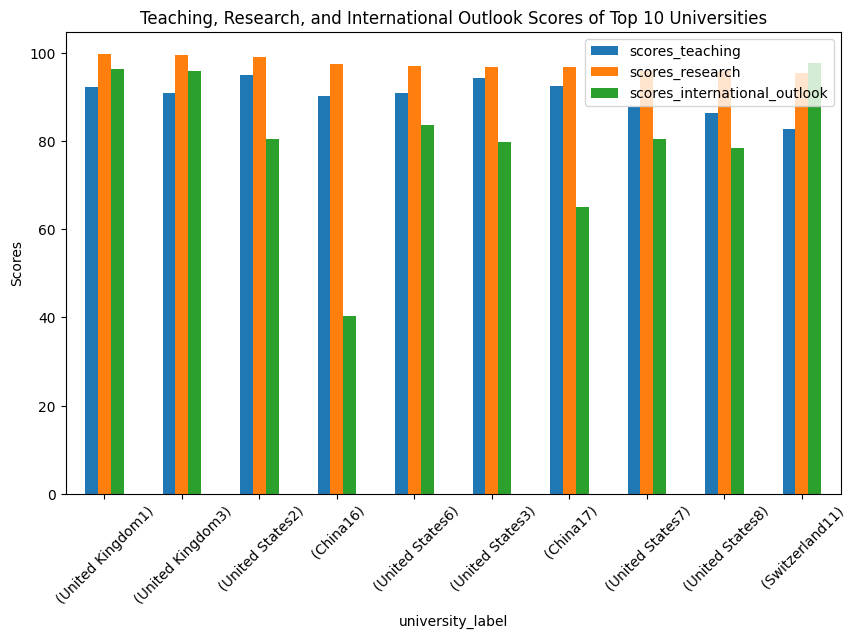

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort universities by overall research scores and select top 10
# Combine university names with their locations and ranks
merged_data['university_label'] = ' (' + merged_data['location'] + merged_data['rank'].astype(str) + ')'
merged_data_1 = merged_data[['university_label', 'scores_teaching', 'scores_research', 'scores_international_outlook']].sort_values(by='scores_research', ascending=False).head(10)

# Create a bar chart for top 10 universities
merged_data_1.set_index('university_label').plot(kind='bar', figsize=(10, 6))
plt.title('Teaching, Research, and International Outlook Scores of Top 10 Universities')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.show()


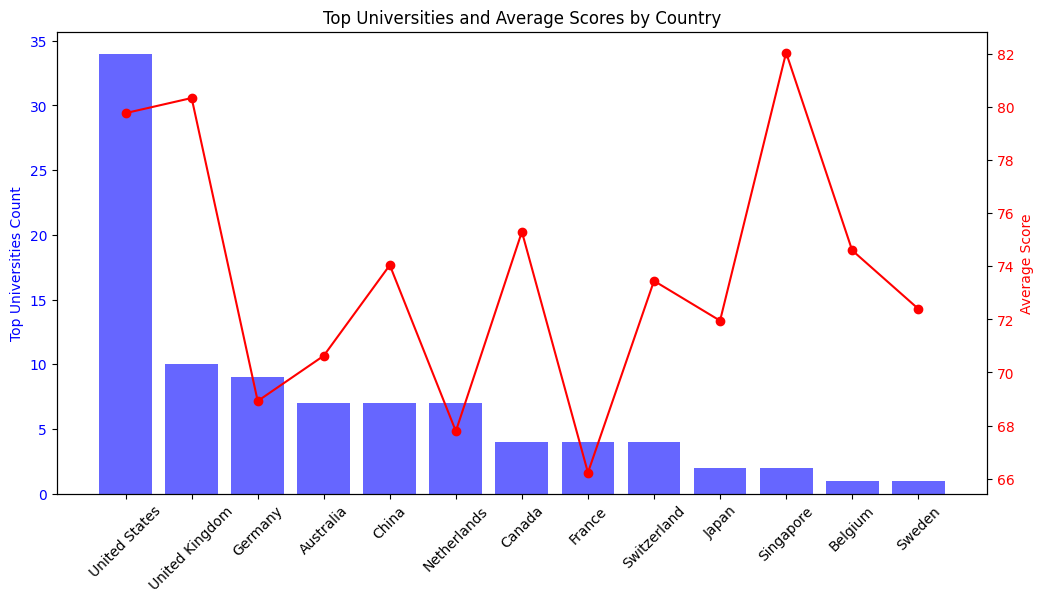

In [42]:
import pandas as pd
import matplotlib.pyplot as plt


top_universities_count = merged_data[merged_data['rank'] <= 100].groupby('Country Name').size()


average_scores = merged_data[merged_data['rank'] <= 100].groupby('Country Name')['scores_overall'].mean()


result = pd.DataFrame({
    'Top Universities Count': top_universities_count,
    'Average Score': average_scores
}).fillna(0)


result = result.sort_values(by='Top Universities Count', ascending=False)


fig, ax1 = plt.subplots(figsize=(12, 6))


ax1.bar(result.index, result['Top Universities Count'], color='b', alpha=0.6, label='Top Universities Count')
ax1.set_ylabel('Top Universities Count', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(result.index, rotation=45)


ax2 = ax1.twinx()
ax2.plot(result.index, result['Average Score'], color='r', marker='o', label='Average Score')
ax2.set_ylabel('Average Score', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Top Universities and Average Scores by Country')
plt.show()


The countries with the highest number of top universities provide us with the chance to choose universities with high rankings.
Also, the average scores of universities can help us evaluate the quality of education and research in that country.

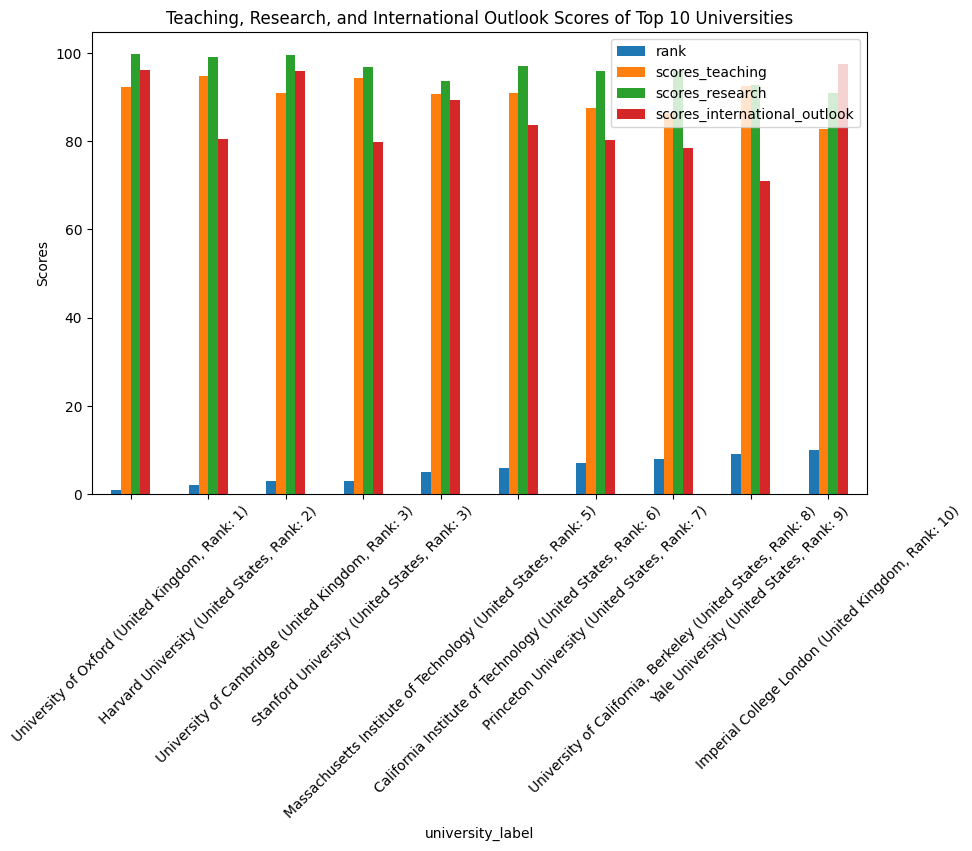

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort universities by overall scores (you can change 'scores_overall' to the column you want)
merged_data_1 = merged_data[['name', 'location', 'rank', 'scores_teaching', 'scores_research', 'scores_international_outlook']].sort_values(by='rank').head(10)

# Combine university names with their locations and ranks
merged_data_1['university_label'] = merged_data_1['name'] + ' (' + merged_data_1['location'] + ', Rank: ' + merged_data_1['rank'].astype(str) + ')'

# Create a bar chart for top 10 universities
merged_data_1.set_index('university_label').plot(kind='bar', figsize=(10, 6))
plt.title('Teaching, Research, and International Outlook Scores of Top 10 Universities')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.show()


In [44]:
print(merged_data['rank'].dtype)


int64


In [45]:
import plotly.express as px


top_universities = merged_data[merged_data['rank'] <= 100]


fig = px.bar(
    top_universities,
    x='Country Name',
    y='rank',
    color='rank',
    title='Top-Ranked Universities by Country',
    text='name'
)
fig.show()

## 2.1. Key Insight on Economy (Rising Insight)

In [46]:
fig = px.scatter(
    merged_data,
    x='GDP per capita (current US$)',
    y='rank',
    color='Country Name',
    title='Relationship Between GDP per Capita and University Rank',
    hover_name='name',
    log_x=True  
)
fig.show()


Countries such as the United States and Switzerland with high GDP per capita typically have highly ranked universities, indicating high financial resources and significant investment in research and education. On the contrary, countries like China with lower GDP per capita also have high-ranking universities, which can indicate strategic policies and investments in the field of education and research.

## 2.2 . Comparison of University Metrics(Rising Insight)

In [47]:
import plotly.graph_objects as go


selected_universities = merged_data[merged_data['rank'] <= 10]

fig_radar = go.Figure()

for _, row in selected_universities.iterrows():
    
    university_label = f"{row['name']} (Rank: {row['rank']})"
    
    
    fig_radar.add_trace(go.Scatterpolar(
        r=[
            row['scores_teaching'],
            row['scores_research'],
            row['scores_international_outlook'],
            row['scores_teaching']  
        ],
        theta=['Teaching', 'Research', 'International Outlook', 'Teaching'],
        fill='toself',
        name=university_label  
    ))

fig_radar.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 100])
    ),
    title='Comparison of Top Universities in Teaching, Research, and International Outlook'
)

fig_radar.show()


## 2.3.Link Between Education and Population (Rising Insight)

In [48]:
fig = px.scatter(
    merged_data,
    x='Population, total',
    y='rank',
    color='Country Name',
    title='Relationship Between Population and University Rank',
    hover_name='name'
)
fig.show()


## 3.Surprising Findings (Aha Moment)

In [49]:
# شناسایی و نمایش نتایج غیرمنتظره با توضیحات
outliers = merged_data[(merged_data['rank'] < 50) & (merged_data['GDP per capita (current US$)'] < 20000)]
print("Surprising universities:", outliers[['name', 'rank', 'GDP per capita (current US$)']])


Surprising universities:                    name  rank  GDP per capita (current US$)
15  Tsinghua University    16                   12614.06099
16    Peking University    17                   12614.06099


Discovery of correlation between GDP and university performance

In [50]:
correlation = merged_data['Population, total'].corr(merged_data['rank'])
print(f'Correlation between GDP and University Scores: {correlation}')

Correlation between GDP and University Scores: -0.07994891118477053


In [51]:
correlation = merged_data['Urban population (% of total population)'].corr(merged_data['rank'])
print(f'Correlation between Urban population (% of total population) and University Scores: {correlation}')

Correlation between Urban population (% of total population) and University Scores: -0.14938145756908017


-----------------------------------------------------------------------------------------------------------------------------------------------------
# New Part 

# Telling Story
## 1. Initial Context (Setting)/hook
The Times Higher Education World University Rankings are the only global performance tables that judge research-intensive universities across all their core missions: teaching, research, knowledge transfer and international outlook. We use 13 carefully calibrated performance indicators to provide the most comprehensive and balanced comparisons, trusted by students, academics, university leaders, industry and governments.

**The performance indicators are grouped into five areas: Teaching (the learning environment); Research (volume, income and reputation); Citations (research influence); International outlook (staff, students and research); and Industry income (knowledge transfer).**

In [68]:
merged_data.columns

Index(['rank_order', 'rank', 'name', 'scores_overall', 'scores_overall_rank',
       'scores_teaching', 'scores_teaching_rank', 'scores_research',
       'scores_research_rank', 'scores_citations', 'scores_citations_rank',
       'scores_industry_income', 'scores_industry_income_rank',
       'scores_international_outlook', 'scores_international_outlook_rank',
       'record_type', 'member_level', 'url', 'nid', 'location',
       'stats_number_students', 'stats_student_staff_ratio',
       'stats_pc_intl_students', 'stats_female_male_ratio', 'aliases',
       'subjects_offered', 'closed', 'unaccredited', 'disabled',
       'Country Name', 'GDP (current US$)', 'GDP growth (annual %)',
       'GDP per capita (current US$)', 'Inflation, consumer prices (annual %)',
       'Population, total',
       'Unemployment, total (% of total labor force) (national estimate)',
       'Urban population (% of total population)', 'university_label',
       'GDP per Capita Category', 'GDP Growth Categor

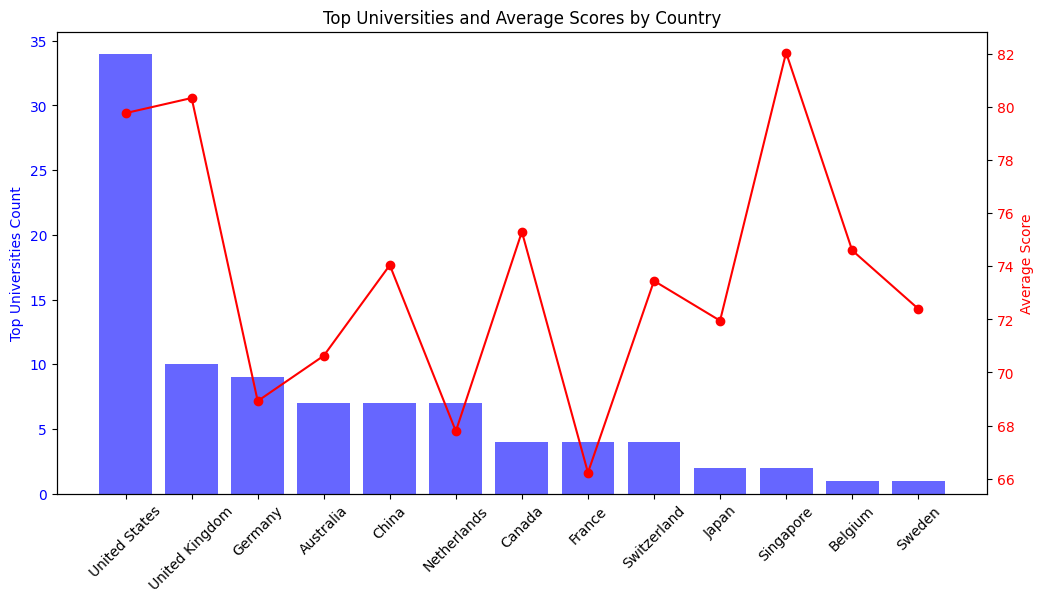

In [52]:
import pandas as pd
import matplotlib.pyplot as plt


top_universities_count = merged_data[merged_data['rank'] <= 100].groupby('Country Name').size()


average_scores = merged_data[merged_data['rank'] <= 100].groupby('Country Name')['scores_overall'].mean()


result = pd.DataFrame({
    'Top Universities Count': top_universities_count,
    'Average Score': average_scores
}).fillna(0)


result = result.sort_values(by='Top Universities Count', ascending=False)


fig, ax1 = plt.subplots(figsize=(12, 6))


ax1.bar(result.index, result['Top Universities Count'], color='b', alpha=0.6, label='Top Universities Count')
ax1.set_ylabel('Top Universities Count', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(result.index, rotation=45)


ax2 = ax1.twinx()
ax2.plot(result.index, result['Average Score'], color='r', marker='o', label='Average Score')
ax2.set_ylabel('Average Score', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Top Universities and Average Scores by Country')
plt.show()


## 2. Ranking and performance of universities
### Question: Which universities have the highest rank in the overall score?

Objective: To identify the universities that have the best overall performance and maintain their position among the top universities.

In [53]:
import plotly.express as px


top_universities = merged_data.sort_values(by='scores_overall_rank').head(10)  


fig = px.bar(
    top_universities,
    x='scores_overall',
    y='name',
    orientation='h',
    title='Top Universities by Overall Score',
    labels={'scores_overall': 'Overall Score', 'name': 'University Name'},
    text='rank'  
)

fig.show()


## Question: Which universities have the best performance in the fields of teaching and research?

Objective: To investigate which universities are more successful in educational and research aspects and what is the reason for their success.


In [54]:
import plotly.express as px
import pandas as pd


top_universities = merged_data.sort_values(by='scores_teaching_rank').head(10)


top_universities['name_with_rank'] = top_universities['name'] + ' (Rank: ' + top_universities['scores_teaching_rank'].astype(str) + ')'


data_melted = pd.melt(top_universities, id_vars=['name_with_rank'], 
                      value_vars=['scores_teaching', 'scores_research'],
                      var_name='Metric', value_name='Score')


fig = px.bar(
    data_melted,
    x='name_with_rank',
    y='Score',
    color='Metric',
    barmode='group',
    title='Comparison of Teaching and Research Scores for Top Universities',
    labels={'name_with_rank': 'University (Rank)', 'Score': 'Score'}
)

fig.show()



## Question: Which universities have the best rank in industrial income index?

Objective: To analyze the ability of universities to attract investment and generate income from cooperation with industries.

Understanding the analysis of universities' ability to attract investment and generate revenue through industry partnerships can have several important implications:

1. **Strengthening University Financial Policies**: Universities that excel in attracting industry investment can serve as models for others. This can help universities improve their strategies for securing funding and fostering partnerships with industries.

2. **Enhancing Industry-University Collaborations**: This analysis highlights which universities have successfully established sustainable and effective partnerships with industries. Identifying these universities can inspire similar collaborations for other institutions and industries.

3. **Increasing Employment and Research Opportunities**: Universities with higher industrial investment often have more research projects, providing students and researchers with greater opportunities for work and skill development.

4. **Talent Attraction**: Universities that attract more industrial investment typically offer better research and educational facilities. This can draw in more talented students and faculty members.

5. **International Competitiveness**: Universities that are more successful in securing industry funding can achieve a stronger position in global competition and enhance their institutional reputation.

6. **Regional and National Economic Development**: Universities that maintain strong partnerships with industries can contribute to the economic growth of their region and country. These collaborations can foster innovation and facilitate the transfer of knowledge between academia and industry.

Overall, this analysis can guide strategic decision-making in university management, government policy in higher education, and economic development efforts.

In [55]:
import plotly.express as px


top_industry_income_universities = merged_data.sort_values(by='scores_industry_income_rank').head(10)


top_industry_income_universities['name_with_rank'] = top_industry_income_universities['name'] + ' (Rank: ' + top_industry_income_universities['scores_industry_income_rank'].astype(str) + ')'


fig = px.bar(
    top_industry_income_universities,
    x='name_with_rank',
    y='scores_industry_income',
    title='Top Universities by Industry Income Score',
    labels={'name_with_rank': 'University (Rank)', 'scores_industry_income': 'Industry Income Score'},
    color='name_with_rank'
)

fig.update_layout(xaxis_title='University (Rank)', yaxis_title='Industry Income Score')
fig.show()


## 2. The effect of economic indicators on the ranking of universities
### Question: Is there a relationship between the gross domestic product (GDP) of the country and the ranking of its universities?

Objective: To understand the relationship between the national economy and the ranking of universities, which can indicate the importance of government investment in higher education.

In [56]:
import pandas as pd

# Check for missing values
print(merged_data[['Country Name', 'GDP (current US$)', 'rank']].isnull().sum())

# Drop rows with missing GDP or rank values
merged_data = merged_data.dropna(subset=['GDP (current US$)', 'rank'])

# Convert GDP to numeric if it's not already
merged_data['GDP (current US$)'] = pd.to_numeric(merged_data['GDP (current US$)'], errors='coerce')


Country Name         12
GDP (current US$)    12
rank                  0
dtype: int64


In [57]:
# Calculate the correlation coefficient
correlation = merged_data['GDP (current US$)'].corr(merged_data['rank'])
print("Correlation coefficient between GDP and university rankings:", correlation)


Correlation coefficient between GDP and university rankings: -0.19226949280550504


Weak Negative Correlation: A correlation coefficient close to 
The correlation coefficient of approximately −0.19 indicates a weak negative relationship between GDP and university rankings.  and it indicat that changes in GDP are not strongly linked to changes in university rankings.indicating that changes in GDP are not strongly linked to changes in university rankings.

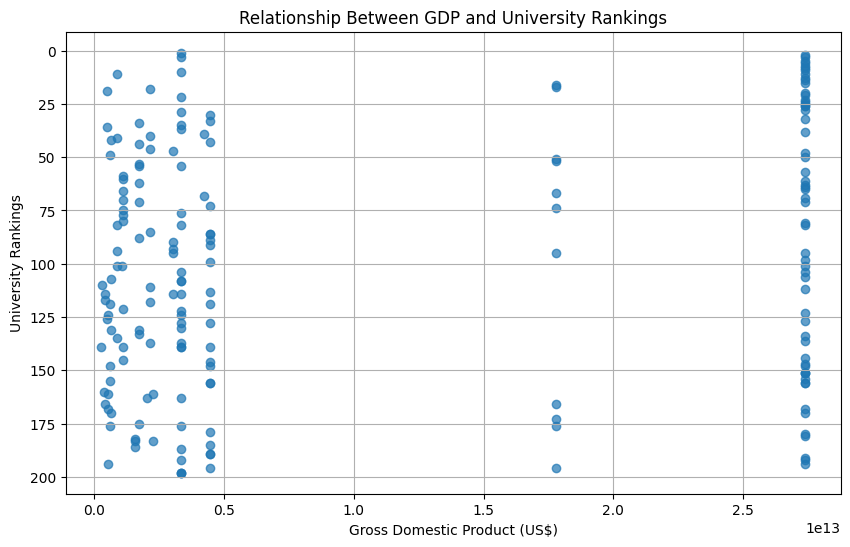

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(merged_data['GDP (current US$)'], merged_data['rank'], alpha=0.7)
plt.title('Relationship Between GDP and University Rankings')
plt.xlabel('Gross Domestic Product (US$)')
plt.ylabel('University Rankings')
plt.gca().invert_yaxis()  # Invert y-axis to show better rankings at the top
plt.grid()
plt.show()


### Question: What is the relationship between the country's economic growth and the ranking of its universities?

Objective: To investigate whether countries with high economic growth have better universities or not.

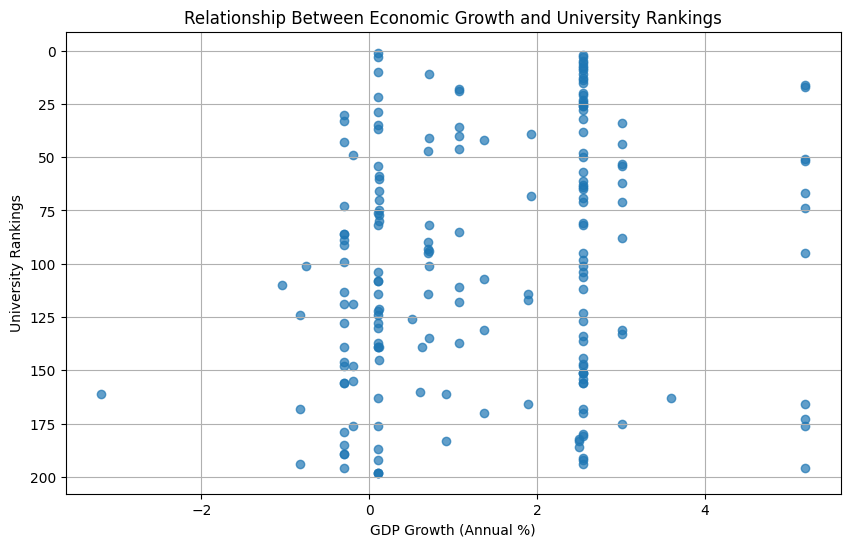

In [59]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['GDP growth (annual %)'], merged_data['rank'], alpha=0.7)
plt.title('Relationship Between Economic Growth and University Rankings')
plt.xlabel('GDP Growth (Annual %)')
plt.ylabel('University Rankings')
plt.gca().invert_yaxis()
plt.grid()
plt.show()


### Question: How do universities located in countries with high unemployment rates do?

Objective: To analyze whether high unemployment has an effect on the performance and ranking of universities or not.

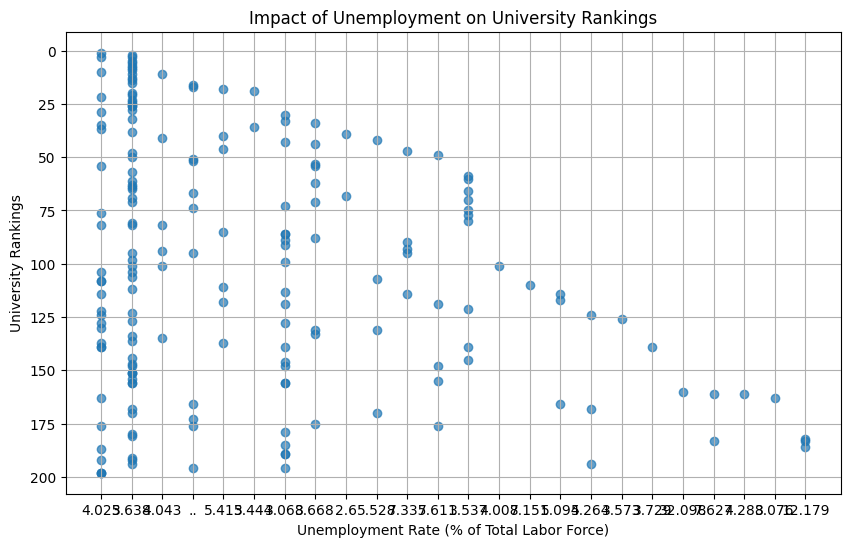

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Unemployment, total (% of total labor force) (national estimate)'], merged_data['rank'], alpha=0.7)
plt.title('Impact of Unemployment on University Rankings')
plt.xlabel('Unemployment Rate (% of Total Labor Force)')
plt.ylabel('University Rankings')
plt.gca().invert_yaxis()
plt.grid()
plt.show()

الف. ارتباط تعداد دانشجویان با رتبه دانشگاه‌ها
نمودار: نمودار پراکنده

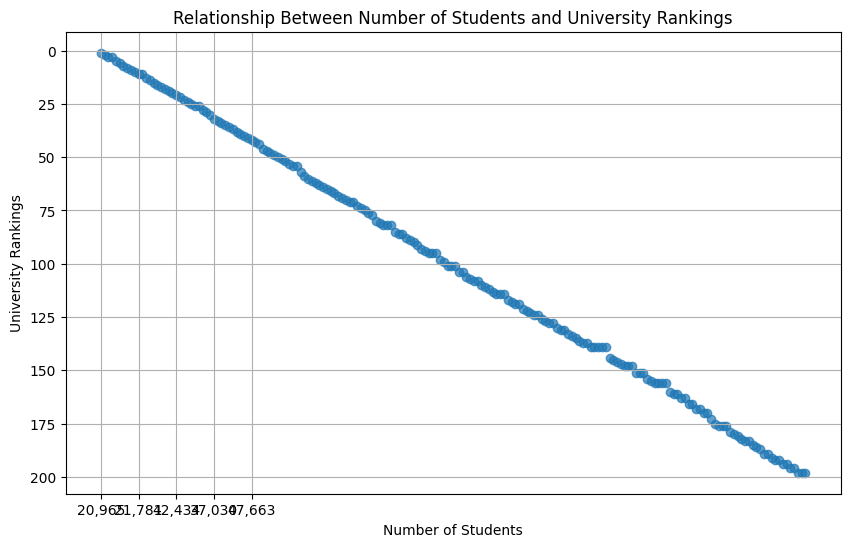

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['stats_number_students'], merged_data['rank'], alpha=0.7)
plt.title('Relationship Between Number of Students and University Rankings')
plt.xlabel('Number of Students')
plt.ylabel('University Rankings')
plt.gca().invert_yaxis()
plt.xticks([0, 10, 20, 30, 40])
plt.grid()
plt.show()


ب. تأثیر نسبت دانشجو به استاد بر رتبه‌بندی
نمودار: نمودار پراکنده

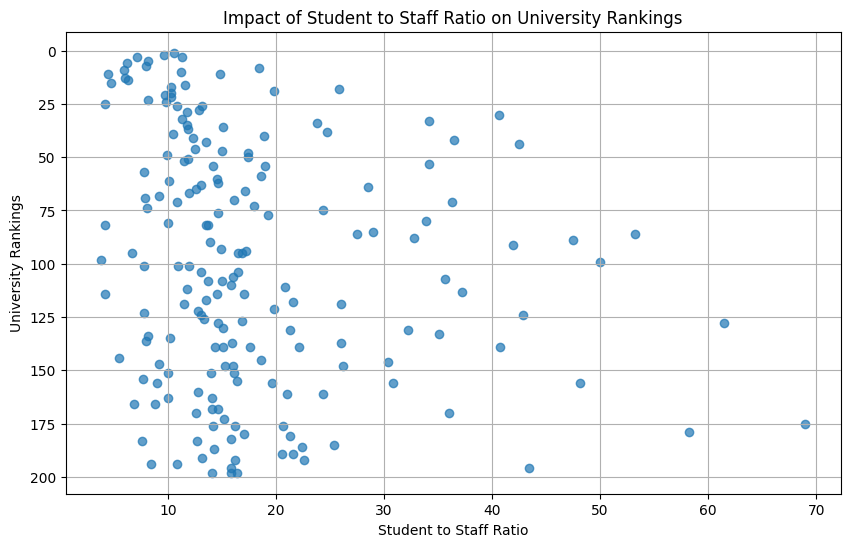

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['stats_student_staff_ratio'], merged_data['rank'], alpha=0.7)
plt.title('Impact of Student to Staff Ratio on University Rankings')
plt.xlabel('Student to Staff Ratio')
plt.ylabel('University Rankings')
plt.gca().invert_yaxis()

plt.grid()
plt.show()


### Question: How is the proportion of international students distributed in universities?

Objective: To understand how different universities have been able to attract international students and what effect it has on their ranking.

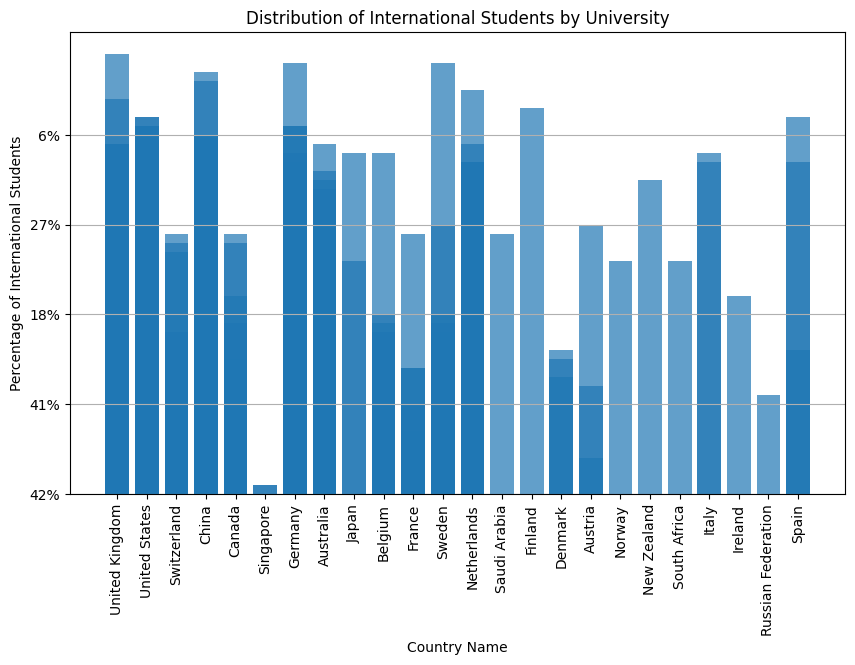

In [63]:
plt.figure(figsize=(10, 6))
plt.bar(merged_data['Country Name'], merged_data['stats_pc_intl_students'], alpha=0.7)
plt.title('Distribution of International Students by University')
plt.xlabel('Country Name')
plt.ylabel('Percentage of International Students')
plt.xticks(rotation=90)
plt.yticks([0, 10, 20, 30, 40])
plt.grid(axis='y')
plt.show()


This chart shows the percentage of international students at universities in various countries. The vertical axis represents the percentage of international students, while the horizontal axis lists the names of countries with universities included in this data.

Key points in interpreting this chart:

Differences in percentages: It appears that countries like the United Kingdom, Switzerland, and Australia have a high percentage of international students. This may be due to the high quality of education and the appeal of these countries for foreign students.

Lower percentages in some countries: Countries like Canada, Saudi Arabia, and Northern European nations have a lower percentage of international students. This could be due to various factors, such as immigration policies, the language of instruction, and living costs.

Geographic diversity: A variety of countries from different continents are represented in this chart. This diversity reflects the interest of international students in studying in various countries, though some regions, like the UK and Australia, seem to be more attractive.

Overall, this chart highlights the appeal of different countries for international students and the relative distribution of international students in universities across these countries.

## 4. Social and economic characteristics of universities


### Question: In which countries are the leading universities located and why?

Objective: To identify the countries with the best universities and examine the economic and social indicators that contribute to their success.(Sort the data by GDP per capita in descending order)

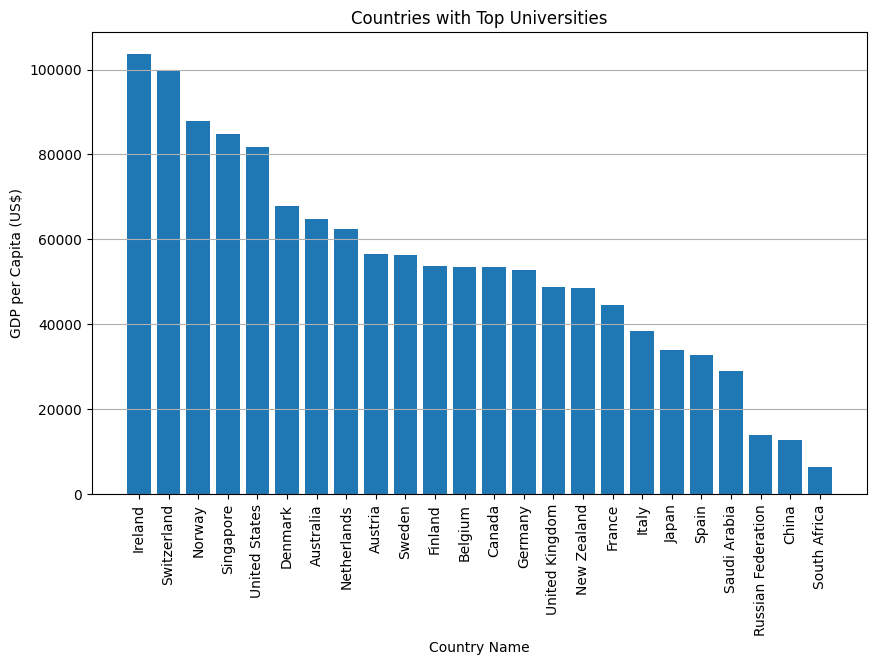

In [64]:
# 
sorted_data = merged_data.sort_values('GDP per capita (current US$)', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(sorted_data['Country Name'], sorted_data['GDP per capita (current US$)'])
plt.title('Countries with Top Universities')
plt.xlabel('Country Name')
plt.ylabel('GDP per Capita (US$)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()



### Question: Which universities have surpassed their peers in the overall ranking?

Objective: To identify the universities that performed better than others in the rankings and their possible reasons.

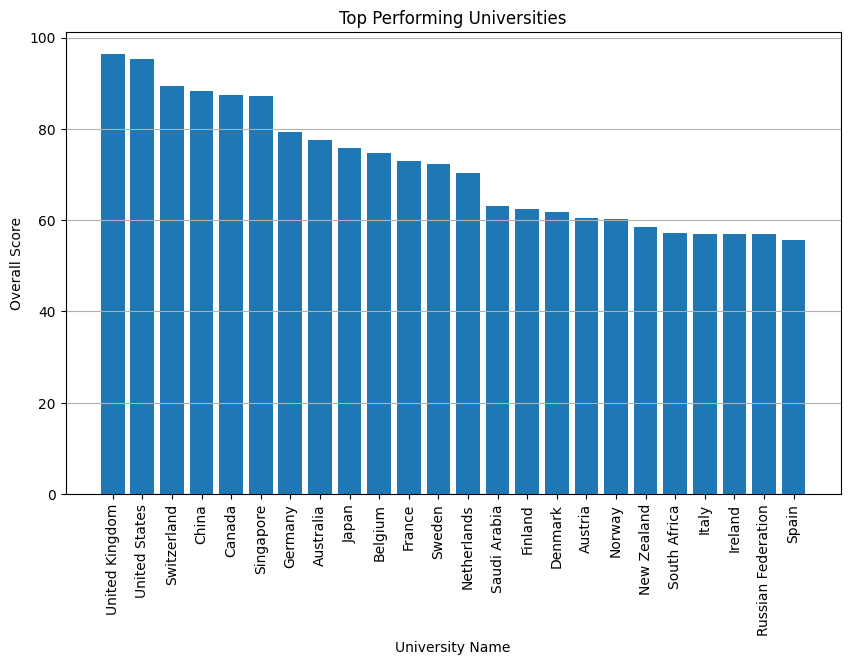

In [65]:
plt.figure(figsize=(10, 6))
plt.bar(merged_data['Country Name'], merged_data['scores_overall'])
plt.title('Top Performing Universities')
plt.xlabel('University Name')
plt.ylabel('Overall Score')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

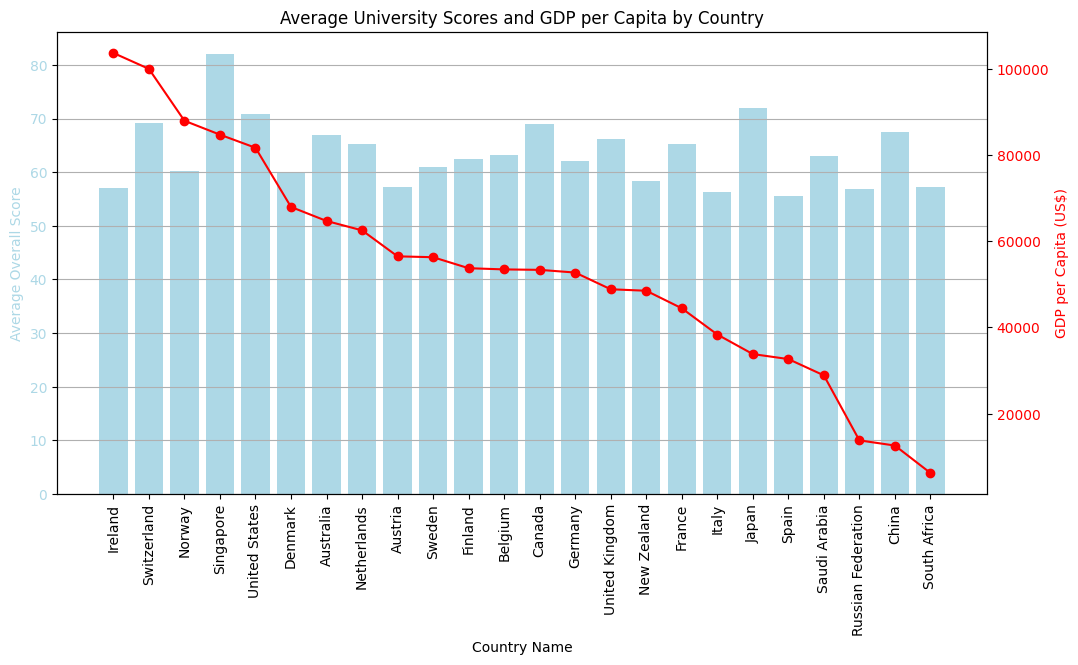

In [66]:

grouped_data = merged_data.groupby('Country Name').agg({
    'scores_overall': 'mean',
    'GDP per capita (current US$)': 'mean'
}).reset_index()


sorted_grouped_data = grouped_data.sort_values('GDP per capita (current US$)', ascending=False)


fig, ax1 = plt.subplots(figsize=(12, 6))


ax1.bar(sorted_grouped_data['Country Name'], sorted_grouped_data['scores_overall'], color='lightblue', label='Average Overall Score')
ax1.set_xlabel('Country Name')
ax1.set_ylabel('Average Overall Score', color='lightblue')
ax1.tick_params(axis='y', labelcolor='lightblue')
ax1.set_xticklabels(sorted_grouped_data['Country Name'], rotation=90)


ax2 = ax1.twinx()
ax2.plot(sorted_grouped_data['Country Name'], sorted_grouped_data['GDP per capita (current US$)'], color='red', marker='o', label='Average GDP per Capita')
ax2.set_ylabel('GDP per Capita (US$)', color='red')
ax2.tick_params(axis='y', labelcolor='red')


plt.title('Average University Scores and GDP per Capita by Country')
ax1.grid(axis='y')

plt.show()



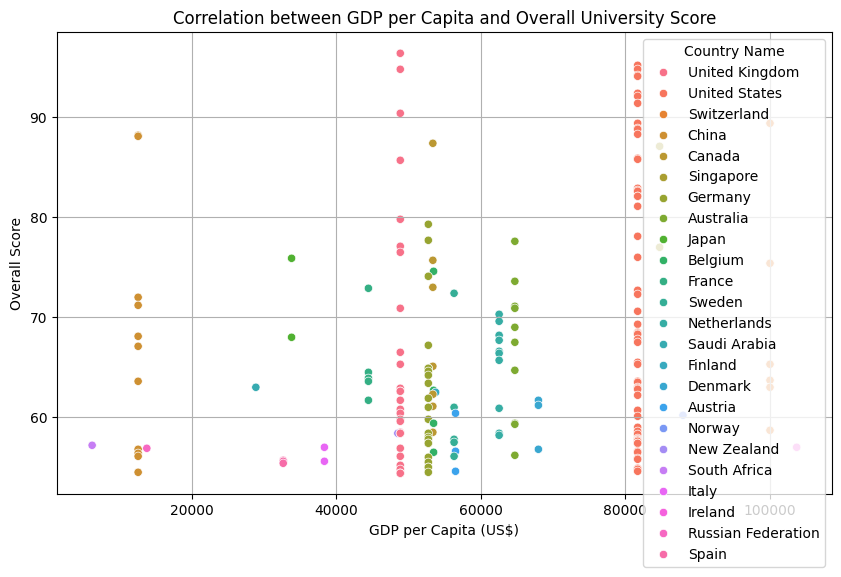

Potential Aha! Moments:
    Country Name  GDP per capita (current US$)  scores_overall
15        China                   12614.06099            88.2
16        China                   12614.06099            88.1


In [67]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP per capita (current US$)', y='scores_overall', data=merged_data, hue='Country Name')
plt.title('Correlation between GDP per Capita and Overall University Score')
plt.xlabel('GDP per Capita (US$)')
plt.ylabel('Overall Score')
plt.grid(True)
plt.show()


outliers = merged_data[(merged_data['GDP per capita (current US$)'] < 20000) & (merged_data['scores_overall'] > 80)]
print("Potential Aha! Moments:\n", outliers[['Country Name', 'GDP per capita (current US$)', 'scores_overall']])


## Solution and Next Steps
The results of our analysis show that there is no direct and strong relationship between GDP per capita and the ranking of universities. For example, country X with the same GDP as country Y has different university rankings. This means that other factors such as the quality of education, investment in research, and the educational system should also be considered. It is recommended to focus on better results in the ranking of global categories to improve the quality of education and scientific research, instead of only on GDP.